In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

In [11]:
fp = 'C:/Users/Satashree/Desktop/music_analysis/daisy1.wav'

In [16]:
sig, sr = librosa.core.load(fp)

In [17]:
sig.shape, sr

((464896,), 22050)

In [18]:
import IPython as ipd
ipd.display.Audio(fp)

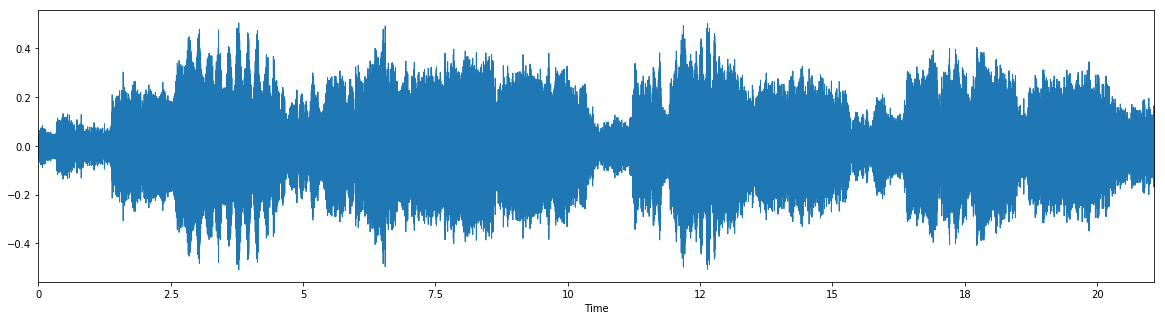

In [20]:
import librosa.display
plt.figure(figsize=(20,5))
librosa.display.waveplot(sig, sr=sr)

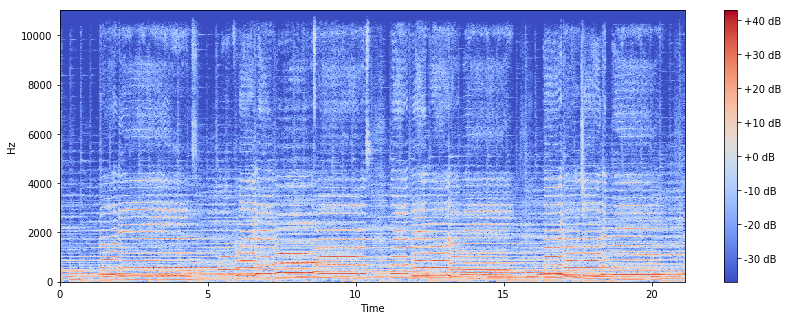

In [23]:
# Displaying spectrogram in dB scale
S = librosa.stft(sig)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14,5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")

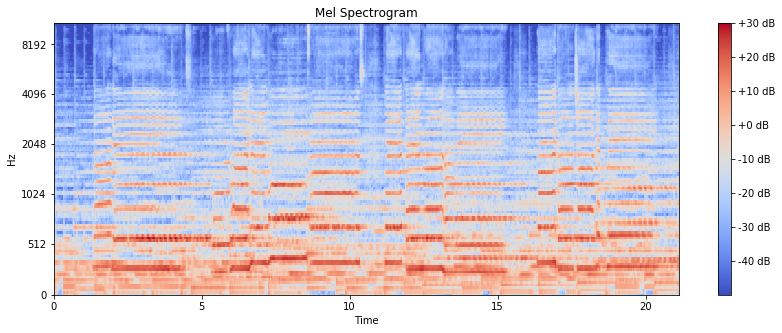

In [25]:
# Mel spectrogram using power spectrum
P = np.abs(S)**2
M = librosa.feature.melspectrogram(S=P)
# The number of mel filters used in mel filterbank is 128 by default
plt.figure(figsize=(14,5))
plt.title("Mel Spectrogram")

librosa.display.specshow(librosa.power_to_db(M), y_axis="mel", x_axis="time")
plt.colorbar(format="%+2.0f dB")

In [26]:
# Onset detection
# Basic onset detector. Locate note onset events by picking peaks in an onset strength envelope.
onset_frames = librosa.onset.onset_detect(y=sig, sr=sr)
librosa.frames_to_time(onset_frames, sr=sr)

array([ 0.06965986,  0.37151927,  0.71981859,  1.06811791,  1.39319728,
        1.7414966 ,  2.04335601,  2.39165533,  2.71673469,  3.27401361,
        3.36689342,  3.90095238,  4.01705215,  4.34213152,  4.5046712 ,
        4.99229025,  5.31736961,  5.43346939,  5.66566893,  5.9907483 ,
        6.10684807,  6.64090703,  6.73378685,  6.98920635,  7.29106576,
        7.63936508,  7.94122449,  8.59138322,  9.2647619 ,  9.56662132,
       10.24      , 10.37931973, 10.56507937, 10.68117914, 10.89015873,
       11.19201814, 11.261678  , 11.86539683, 11.93505669, 12.51555556,
       12.65487528, 13.16571429, 13.2585941 , 13.51401361, 13.67655329,
       14.46603175, 14.62857143, 14.79111111, 15.11619048, 15.44126984,
       15.60380952, 15.76634921, 16.09142857, 16.39328798, 16.97378685,
       17.06666667, 17.64716553, 18.36698413, 18.69206349, 18.80816327,
       19.01714286, 19.66730159, 19.99238095, 20.31746032, 20.64253968,
       20.82829932, 20.96761905])

In [29]:
# Onset envelope
o_env = librosa.onset.onset_strength(sig, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames2 = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
onset_frames2

array([  3,  16,  31,  46,  60,  75,  88, 103, 117, 141, 145, 168, 173,
       187, 194, 215, 229, 234, 244, 258, 263, 286, 290, 301, 314, 329,
       342, 370, 399, 412, 441, 447, 455, 460, 469, 482, 485, 511, 514,
       539, 545, 567, 571, 582, 589, 623, 630, 637, 651, 665, 672, 679,
       693, 706, 731, 735, 760, 791, 805, 810, 819, 847, 861, 875, 889,
       897, 903], dtype=int64)

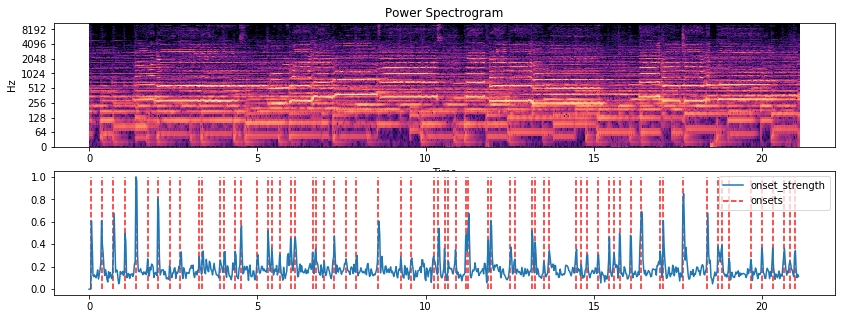

In [31]:
P2 = np.abs(S)
plt.figure(figsize=(14,5))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(P2, ref=np.max), x_axis='time', y_axis='log')
plt.title("Power Spectrogram")
plt.subplot(2,1,2, sharex=ax1)
plt.plot(times, o_env, label="onset_strength")
plt.vlines(times[onset_frames2], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label="onsets")
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

In [33]:
# Separating the harmonic and percussive elements componenents of a music signal
sig_harmonic, sig_percussive = librosa.effects.hpss(sig)

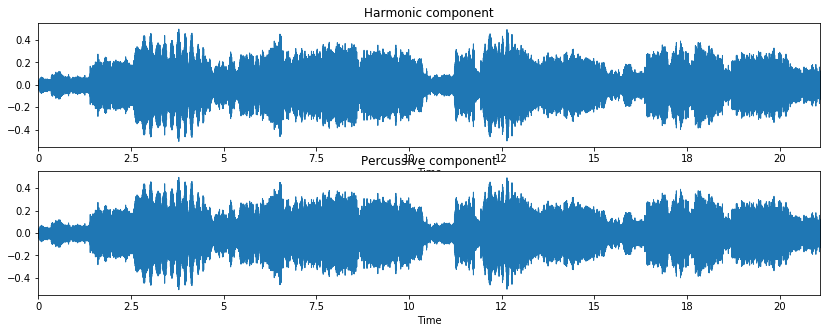

In [37]:
plt.figure(figsize=(14,5))
plt.subplot(2,1,1)
plt.title("Harmonic component")
librosa.display.waveplot(sig_harmonic, sr=sr)
plt.subplot(2,1,2)
plt.title("Percussive component")
librosa.display.waveplot(sig_harmonic, sr=sr)


In [38]:
# Observation: The given audio signal has no separate components

In [39]:
# Estimate static tempo (beats per minute)
tempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr)
tempo

array([92.28515625])

In [44]:
# Dynamic tempo
dtempo = librosa.beat.tempo(onset_envelope=o_env, sr=sr, aggregate=None)
# dtempo has 909 values
# get unique dtempo values
unq_dtempo = sorted(set(dtempo))
unq_dtempo

[92.28515625,
 103.359375,
 107.666015625,
 117.45383522727273,
 123.046875,
 143.5546875]

In [47]:
# MFCC analysis
import const_frame_main

In [48]:
mfccs, nframes = const_frame_main.sig_mfcc(sig, sr=sr, frame_size=0.025, frame_stride=0.01, N=512, nfilt=40, num_ceps=13)

In [50]:
mfccs.shape, nframes

((2112, 14), 2112)

Text(0.5, 1.0, 'MFCC')

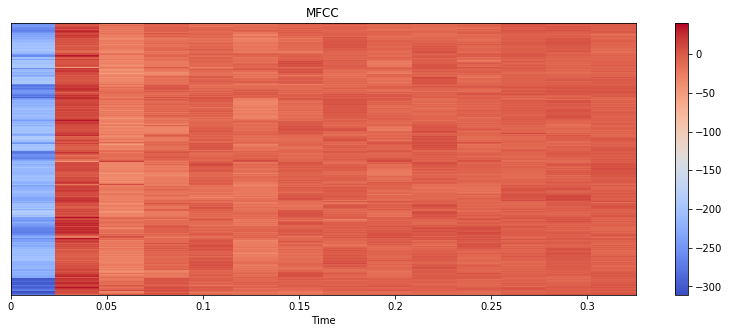

In [51]:
plt.figure(figsize=(14,5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [86]:
import pitch_sync_frame_main

In [87]:
s, pitch = pitch_sync_frame_main.signal_start_point(sig, offset=4)
marks, pitches, num_frames = pitch_sync_frame_main.pitch_marks(sig, pitch, offset=4)

ValueError: not enough values to unpack (expected 3, got 2)

In [76]:
marks.shape

(6026, 3)